## SPAM MESSENGER CLASSIFIER

In [ ]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import string
import seaborn as sns
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from subprocess import check_output
import nltk
nltk.download('stopwords')


In [55]:
data= pd.read_csv("spam.csv", encoding = 'latin-1')

In [56]:
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data = data.rename(columns={"v1":"class", "v2":"text"})
data.head()

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [77]:
data['length'] = data['text'].apply(len)
data.head()

,class,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [78]:
data.corr

<bound method DataFrame.corr of      class                                               text  length
0      ham  Go until jurong point, crazy.. Available only ...     111
1      ham                      Ok lar... Joking wif u oni...      29
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
3      ham  U dun say so early hor... U c already then say...      49
4      ham  Nah I don't think he goes to usf, he lives aro...      61
...    ...                                                ...     ...
5567  spam  This is the 2nd time we have tried 2 contact u...     161
5568   ham              Will Ì_ b going to esplanade fr home?      37
5569   ham  Pity, * was in mood for that. So...any other s...      57
5570   ham  The guy did some bitching but I acted like i'd...     125
5571   ham                         Rofl. Its true to its name      26

[5572 rows x 3 columns]>

In [81]:
data.size

16716

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
class     5572 non-null object
text      5572 non-null object
length    5572 non-null int64
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


*Visualizing the the text for which are spam and which are ham*

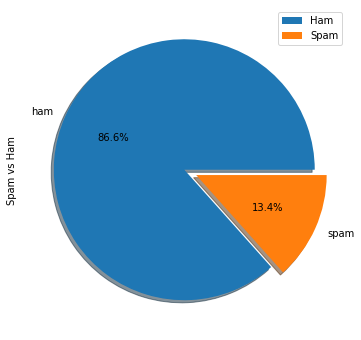

In [22]:
data["class"].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.ylabel("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

In [37]:
topMessages = data.groupby("text")["class"].agg([len, np.max]).sort_values(by = "len", ascending = False).head(n = 10)
display(topMessages)

,len,amax
text,,
"Sorry, I'll call later",30,ham
I cant pick the phone right now. Pls send a message,12,ham
Ok...,10,ham
Your opinion about me? 1. Over 2. Jada 3. Kusruthi 4. Lovable 5. Silent 6. Spl character 7. Not matured 8. Stylish 9. Simple Pls reply..,4,ham
"Wen ur lovable bcums angry wid u, dnt take it seriously.. Coz being angry is d most childish n true way of showing deep affection, care n luv!.. kettoda manda... Have nice day da.",4,ham
Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed å£1000 cash or å£5000 prize!,4,spam
Okie,4,ham
"Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...",4,ham
"7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st \Ur Lovely Friendship\""... good morning dear""",4,ham


*Thus we can see that the top messages are the normal day to day messages whereas the other are basically the spam as they altert on daily basis*


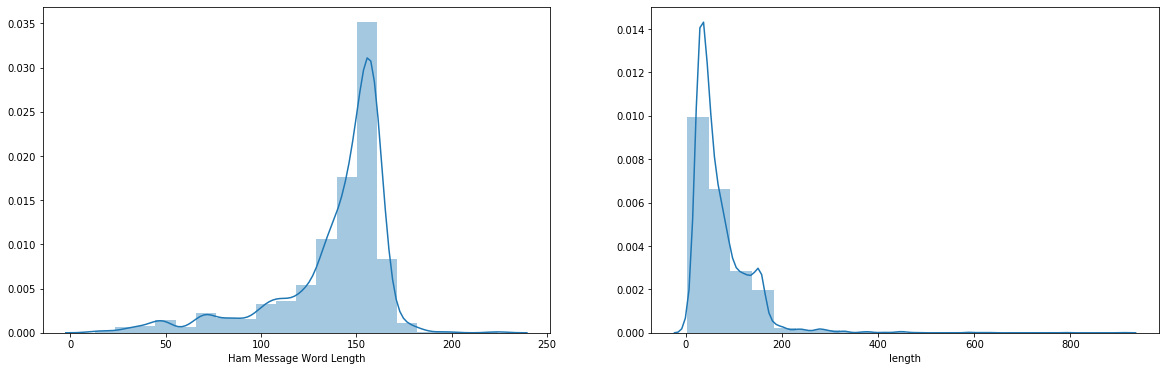

In [44]:
f, ax = plt.subplots(1, 2, figsize = (20, 6))

sns.distplot(data[data["class"] == "spam"]["length"], bins = 20, ax = ax[0])
ax[0].set_xlabel("Spam Message Word Length")

sns.distplot(data[data["class"] == "ham"]["length"], bins = 20, ax = ax[1])
ax[0].set_xlabel("Ham Message Word Length")

plt.show()

Thus length acts as major part in discrimination of Spam and Ham messages

In order to apply a model, the necessary preprocessing must be completed. For text classification, usual preprocessing includes removing stop words (words that don't provide useful meaning, i.e. "and" "or"). Also the characters are converted to a single case (the below function converts to lower case). The function below then stems each word (this means that it replaces a word with the root of that word, for example "tasted" or "tasting" would become "taste").


In [25]:
def pre_process(text):
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    words = ""
    for i in text:
            stemmer = SnowballStemmer("english")
            words += (stemmer.stem(i))+" "
    return words

The below code copies the text data column, so any processing is not compelted on the original data. And then uses a TFIDF vectoriser to provide useful numerical values related to the data. TFIDF (term frequency - inverse document frequency) is a statistical method to tell how important a word is to a particular document by increasing the numerical value for an occurrence in the specific document but decreasing relative to number of occurrences in the entire corpus. 

After this, a function available in the sklearn library is used to randomly assign training and test data to train and test the machine learning models. 

In [119]:
textFeatures = data['text'].copy()
textFeatures = textFeatures.apply(pre_process)
vectorizer = TfidfVectorizer("english")
features = vectorizer.fit_transform(textFeatures)

features_train, features_test, labels_train, labels_test = train_test_split(features, data['class'], test_size=0.3, random_state=111)



In [124]:
labels_train.shape

(3900,)

In [122]:
features_test.shape

(1672, 8037)

. However it would be more effective to use a loop to loop through different gamma values and graphically plot the resuThe following code trains and tests a SVM model using sklearn, The gamma value was achieved by playing around with the figurelts to see which value provides the best result. 

In [67]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

svc = SVC(kernel='sigmoid', gamma=1.0)
svc.fit(features_train, labels_train)
prediction = svc.predict(features_test)
accuracy_score(labels_test,prediction)


0.9784688995215312

In [68]:
svc.score(features_train, labels_train)#Training accuracy

0.9874358974358974

In [76]:
prediction

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

**We have predicted for the label test that it is either Ham or spam**

The following code trains and test a Multinomial Naive Bayes Model using sklearn. It can be seen that is provided a slightly more accurate result than the SVM model so should therefore be used. There are many other models that may be more suitable for this dataset, however both of these model produce sufficient results. 

In [100]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB(alpha=0.2)
mnb.fit(features_train, labels_train)
prediction1 = mnb.predict(features_test)
accuracy_score(labels_test,prediction1)


0.9850478468899522

In [101]:
mnb.score(features_train, labels_train)#Training accuracy

0.9961538461538462

In [94]:
prediction1

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [102]:
prediction=pd.DataFrame(prediction)

In [103]:
prediction1=pd.DataFrame(prediction1)

In [104]:
prediction.head()

,0,0
0,ham,0
1,ham,0
2,ham,0
3,ham,0
4,ham,0


In [105]:
def encodeCategory(cat):
    if cat == "spam":
        return 1
    else:
        return 0
        
prediction["0"]= prediction[0].apply(encodeCategory)
prediction1["0"]= prediction1[0].apply(encodeCategory)


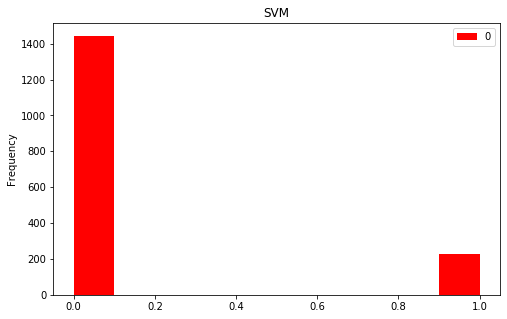

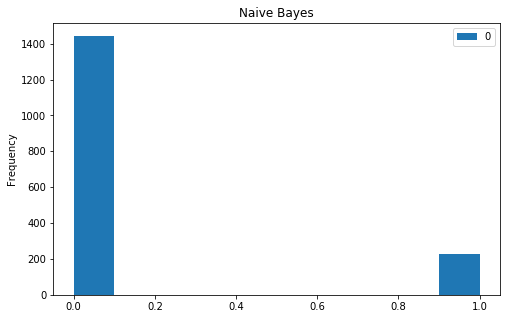

In [128]:
prediction.plot(kind='hist',color='red', figsize=(8, 5))
plt.title("SVM")
prediction1.plot(kind='hist', figsize=(8, 5))
plt.title("Naive Bayes")
plt.show()


In [113]:
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1672 entries, 0 to 1671
Data columns (total 2 columns):
0    1672 non-null object
0    1672 non-null int64
dtypes: int64(1), object(1)
memory usage: 26.2+ KB
